# 1ere PARTIE

In [1]:
dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

#### Afin d'utiliser la fonction apriori, nous devons transformer notre ensemble de données en un DataFrame encodé à chaud.
#### Transaction Encoder crée un tableau NumPy à partir d'une liste et "one-hot" et l'encode (mais dans un format True/False et non en 1 et 0).

In [2]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


# BONUS : un peu de visualisation

true : le produit a été acheté
false : le produit n'a pas été acheté


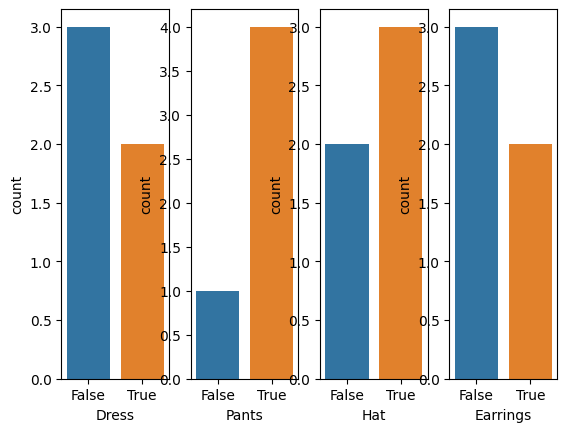

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax =plt.subplots(1,4)
sns.countplot(data= df, x="Dress", ax=ax[0])
sns.countplot(data= df, x="Pants",ax=ax[1])
sns.countplot(data= df, x="Hat",ax=ax[2])
sns.countplot(data= df, x="Earrings",ax=ax[3])
#sns.countplot(data= df, x="Necklace",ax=ax[4])
#sns.countplot(data= df, x="Sandals",ax=ax[5])
#sns.countplot(data= df, x="Scarf",ax=ax[6])
#sns.countplot(data= df, x="Shirt",ax=ax[7])
print("true : le produit a été acheté")
print("false : le produit n'a pas été acheté")

#### Support :  le support quantifie la fréquence d'un ensemble d'éléments.
#### Confiance : Après avoir acheté l'article X, quelle est la probabilité d'acheter l'article Y ?
#### Lift : Quelle est la probabilité d'acheter les articles X et Y ensemble plutôt que d'acheter uniquement l'article X. si lift <=1 peu probable sinon prob

In [4]:
# Sélectionnons des ensembles d'éléments avec un support minimum de 60 %
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.6,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


#### Nous remarquons que la frequence que Pantts et Scarf soient achetés est élevée (80%)

In [5]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


### pour mieux vendre skirt et pants nous pouvons les mettres cote à cote parce que nous avons remarqué la majeure partie des personnes qui achete skirt achete pants aussi

In [6]:
# Associating based on lift
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


# FIN DE LA 1ere PARTIE

# 2eme PARTIE

In [11]:
## Let's import the dataset from local syst
df_ = pd.read_csv("Market_Basket_Optimisation.csv",header=None)
df_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [13]:
popular=df_[0].value_counts().head(70) #Here we list the most popular items
popular

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
                    ... 
cider                 11
almonds               11
light mayo            11
mint                  10
rice                  10
Name: 0, Length: 70, dtype: int64

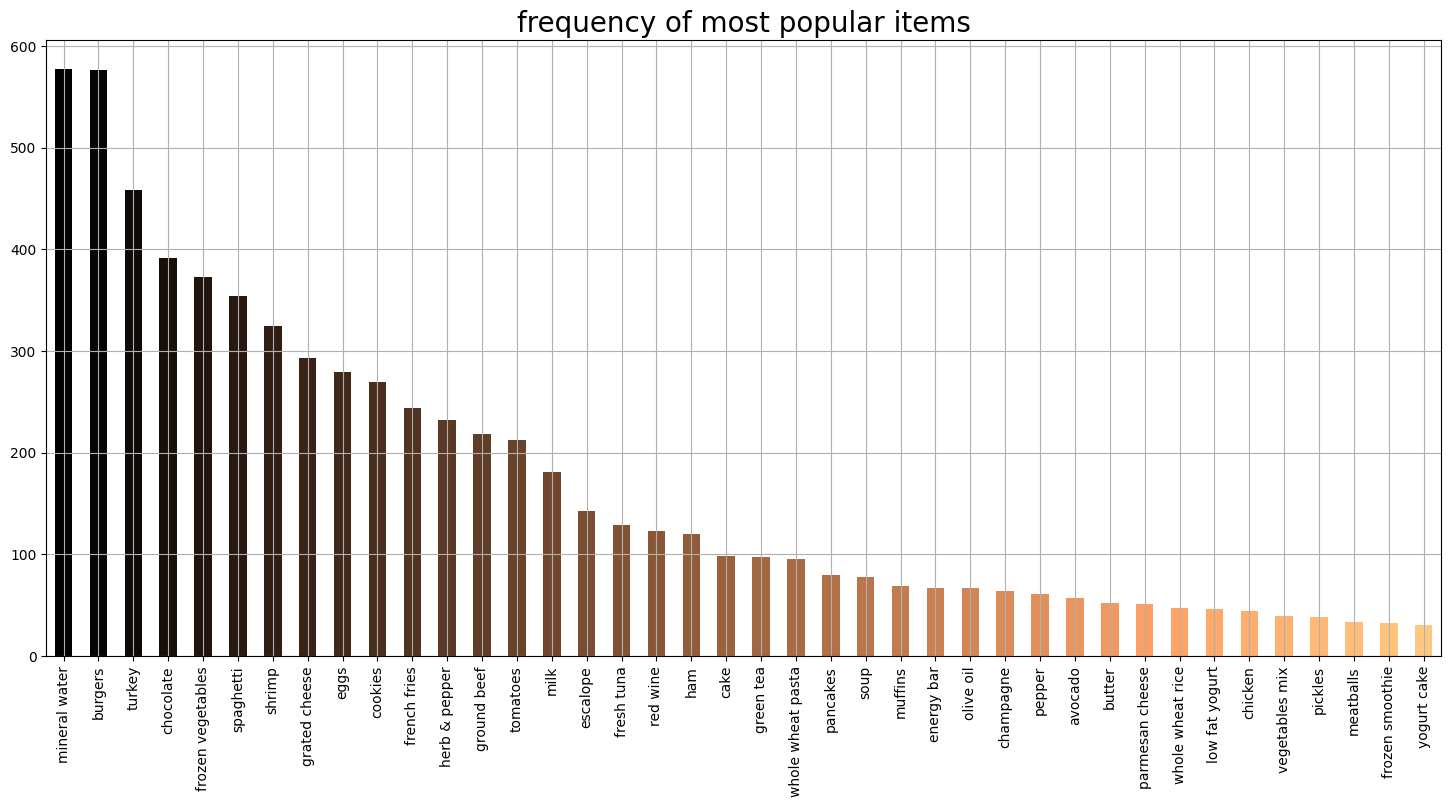

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(18,8))
color = plt.cm.copper(np.linspace(0, 1, 40))
df_[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()

In [15]:
popular = pd.DataFrame(popular)
popular

,0
mineral water,577
burgers,576
turkey,458
chocolate,391
frozen vegetables,373
...,...
cider,11
almonds,11
light mayo,11
mint,10


##### 1) Transfrom Your Data into A List: The algorithm in the apyori package is implemented in such a way that the input to the algorithm is a list of lists rather than a data frame. So we need to convert the data into a list of lists.

##### 2) Set minimum support and confidence

##### 3) Take all the subsets of the transactions that have higher support than minimum support.

##### 4) Take all the rules of the subsets that have higher confidence than minimum confidence.

##### 5) Sort the rules by decreasing lift

In [16]:
#First we transforn dataframe into a list of transactions
products= list()
for i in range(0,7501):
    products.append([str(df_.values[i,j]) for j in range(20)])

In [17]:
products[1] #This is our first transaction in python list

['burgers',
 'meatballs',
 'eggs',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [18]:
from apyori import apriori
model= apriori(products,min_support= 0.003,min_confidence= 0.2,min_lift=3,min_length = 2,max_length = 2)
results = list(model)

In [19]:
pd.DataFrame(results)

,items,support,ordered_statistics
0,"(chicken, light cream)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(mushroom cream sauce, escalope)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(pasta, escalope)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(honey, fromage blanc)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(ground beef, herb & pepper)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
5,"(ground beef, tomato sauce)",0.005333,"[((tomato sauce), (ground beef), 0.37735849056..."
6,"(olive oil, light cream)",0.003200,"[((light cream), (olive oil), 0.20512820512820..."
7,"(whole wheat pasta, olive oil)",0.007999,"[((whole wheat pasta), (olive oil), 0.27149321..."
8,"(pasta, shrimp)",0.005066,"[((pasta), (shrimp), 0.3220338983050847, 4.506..."


In [20]:
bought_item = [tuple(result[2][0][0])[0] for result in results]
will_buy_item = [tuple(result[2][0][1])[0] for result in results]
support_values = [result[1] for result in results]
confidences = [result[2][0][2] for result in results]
lift_values = [result[2][0][3] for result in results]

In [21]:
new_data = list(zip(bought_item,will_buy_item,support_values,confidences,lift_values))

In [22]:
new_df=pd.DataFrame(new_data,columns=["Boungt Item", "Expected To Be Bought", "Support", "Confidence","Lift"])
new_df

,Boungt Item,Expected To Be Bought,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


##### La valeur de prise en charge de la première règle est 0,004533. Ce nombre est calculé en divisant le nombre de transactions contenant de la crème légère divisé par le nombre total de toutes les transactions. Le niveau de confiance pour la règle est de 0,290598, ce qui montre que sur toutes les transactions contenant de la crème légère, 29,0598 % des transactions contiennent également du poulet. Enfin, l'augmentation de 4,84 nous indique que le poulet est 4,84 fois plus susceptible d'être acheté par les clients qui achètent de la crème légère par rapport à la probabilité par défaut de la vente de poulet.

#### Support :  le support quantifie la fréquence d'un ensemble d'éléments.
#### Confiance : Après avoir acheté l'article X, quelle est la probabilité d'acheter l'article Y ?
#### Lift : Quelle est la probabilité d'acheter les articles X et Y ensemble plutôt que d'acheter uniquement l'article X. si lift <=1 peu probable sinon prob

In [23]:
#le paramètre des colonnes détermine ce qui sera basé pour organiser les données
new_df.nlargest(n=10,columns="Lift")

,Boungt Item,Expected To Be Bought,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


##### nous remarquons que le fromage blanc et le miel sont plus succeptible d'etre acheter ensemble.

In [24]:
new_df.nlargest(n=10,columns="Confidence")

,Boungt Item,Expected To Be Bought,Support,Confidence,Lift
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
2,pasta,escalope,0.005866,0.372881,4.700812
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
8,pasta,shrimp,0.005066,0.322034,4.506672
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
0,light cream,chicken,0.004533,0.290598,4.843951
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
3,fromage blanc,honey,0.003333,0.245098,5.164271
6,light cream,olive oil,0.003200,0.205128,3.114710


### apres avoir acheter tomato sauce le client peut aussi acheter ground beef avec une probabilité de 38%